##로지스틱 회귀

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species'])) # 종의 종류 추출

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)#도미와 빙어 2개의 2진분류

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') #불리언 인덱싱 적용
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # 로지스틱 회귀 모델
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5])) #예측 값

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5])) #음성 클래스와 양성 클래스

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_) # 속성값

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_) #샘플들의 값들

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5]) #샘플들의 z값
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit #확률 검증

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
import numpy as np

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000) #규제 완화와 반복횟수 지정
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5])) #예측값

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5]) #예측확률
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_) # 속성값

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape) # 크기 출력

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5]) # 샘플의 z값
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


##확률적 경사 하강법

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier #경사하강법 분류 클래스

In [ ]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) #에포크 10회
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


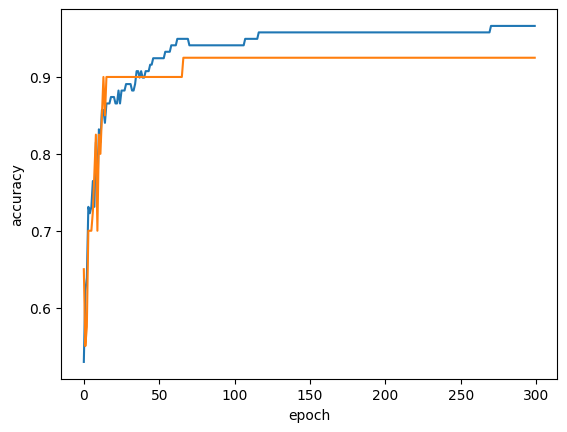

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
